In [1]:
%%capture
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import xarray as xr
import os
import time
import datetime
import collections
import numpy as np
import pandas as pd

In [51]:
ARGO_PER_ID = ['3901267','3901266','3901265','3901264',
               '3901263','3901262','3901261','3901260',
               '3901234','3901233','3901232','3901231']
dataframe = pd.DataFrame()
data = {'platf_num':1,'status':1,'deployed':1,'last_seen':1,
        'f_lat':1,'f_lon':1,'l_lat':1,'l_lon':1,'work_time':1}
data = collections.OrderedDict(data)
for float_id in ARGO_PER_ID:
    argo_data = xr.open_dataset('/data/users/grivera/ARGO-traj/{}_Rtraj.nc'.format('3901232'))#float_id))
    data['platf_num'] = int(argo_data.PLATFORM_NUMBER.data)
    data['deployed'] = argo_data.JULD_FIRST_LOCATION.data[0]
    data['last_seen'] = argo_data.JULD_LAST_LOCATION.data[-1]
    data['f_lat'] = argo_data.LATITUDE.data[0]
    data['f_lon'] = argo_data.LONGITUDE.data[0]
    mask = ~np.isnan(argo_data.LATITUDE.data)
    data['l_lat'] = argo_data.LATITUDE.data[mask][-1]
    data['l_lon'] = argo_data.LONGITUDE.data[mask][-1]
    data['work_time'] = pd.Timedelta(data['last_seen'] - data['deployed'],'h')
    today = datetime.date.today()
    status = np.datetime64(today) - data['last_seen']
    if status > np.timedelta64(10,'D'):
        status = 'Inactive'
    else:
        status = 'Active'
    data['status'] = status
    data['n_cycles'] = argo_data.N_CYCLE.data.size
    eq_time =
    break
pd.Series(data)

platf_num                          3901232
status                            Inactive
deployed     2016-03-12T17:23:00.001857280
last_seen    2016-03-16T02:06:00.000223232
f_lat                                   -5
f_lon                                  -84
l_lat                             -4.97648
l_lon                              -84.005
work_time                  3 days 08:00:00
n_cycles                                 5
dtype: object

In [13]:
int(argo_data.PLATFORM_NUMBER.data)

3901232

In [26]:
argo_data.FORMAT_VERSION

<xarray.DataArray 'FORMAT_VERSION' ()>
array(b'3.1 ', dtype=object)
Attributes:
    long_name:  File format version

In [3]:
rgbset2 = np.array([[20,100,210,256],
[30,110,235,256],
[40,130,240,256],
[60,150,245,256],
[80,165,245,256],
[120,185,250,256],
[150,210,250,256],
[180,240,250,256],
[225,255,255,256],
[245,245,245,256],
[255,250,170,256],
[255,232,120,256],
[255,192,60,256],
[255,160,0,256],
[255,96,0,256],
[255,50,0,256],
[225,20,0,256],
[192,0,0,256],
[165,0,0,256]])

rgbset2.shape


(19, 4)

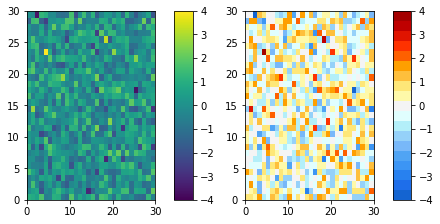

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from collections import OrderedDict

newcmp = ListedColormap(rgbset2/256)
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([cm.get_cmap('viridis'), newcmp])

In [11]:
[(1,2,3)]*5

[(1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3)]